In [4]:
import sklearn.datasets
import numpy as np
import pandas as pd

## Loding the dataset

In [5]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [6]:
for key,val in breast_cancer.items():
    print(key)

data
target
target_names
DESCR
feature_names
filename


In [7]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [8]:
data['class'] = breast_cancer.target

In [9]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


* This is quite an imbalanced dataset,maybe I should upsampling later

In [11]:
print(breast_cancer.target_names)

['malignant' 'benign']


## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop('class', axis=1)
Y = data['class']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

*   In this context, stratification means that the train_test_split method returns training and test subsets that      have the same proportions of class labels as the input dataset.
* If original 0s 25% then in train and test set 25% 0s point.

In [15]:
print(X_train.mean(), X_test.mean(), X.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

## Binarization of Input 
* Because MP neuron takes binary input

In [16]:
import matplotlib.pyplot as plt

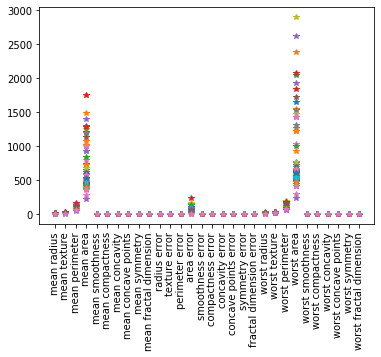

In [17]:
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [18]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

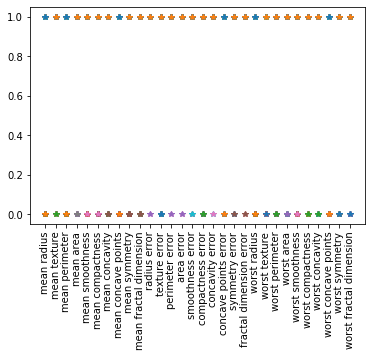

In [19]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [20]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [21]:
X_binarised_test = X_binarised_test.values  #converting back to numpy array,not necessary.
X_binarised_train = X_binarised_train.values

In [22]:
type(X_binarised_test)

numpy.ndarray

## MP Neuron model:

In [23]:
from random import randint

In [24]:
b = 25

i = randint(0,X_binarised_train.shape[0])
print("for row ",i)

if np.sum(X_binarised_train[i,:]) >= b:
    print("MP neuron says malignant")
else:
    print("MP neuron says benign")

if Y_train[i]==1:
    print("True label malignant")
else:
    print("True label benign")

for row  324
MP neuron says benign
True label malignant


In [25]:
b = 5

Y_pred_train = []
accurate_rows = 0

for x,y in zip(X_binarised_train,Y_train):
    y_pred = (np.sum(x)>=b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y== y_pred)
    
print(accurate_rows,accurate_rows/X_binarised_train.shape[0])

321 0.626953125


In [26]:
for b in range(X_binarised_train.shape[1] + 1):
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

  print(b, accurate_rows/X_binarised_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


* It works best for b = 28 . Accuracy of 84% on training set.

## Perceptron (Simple)

In [38]:
from sklearn.metrics import accuracy_score



In [ ]:
X_train = X_train.values
X_test = X_test.values

In [83]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = []
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:  # we need to make np.dot(w,x) to increase closer to 1 ,,and b to reduce if 
          self.w = self.w + lr * x  # if wnew = w+x,in next iteration 
          self.b = self.b - lr * 1  # np.dot((w+x),x) = (w.T)x + (x.T)x
        elif y == 0 and y_pred == 1:# the 2nd part (x.T)x is always positive, square of each term
          self.w = self.w - lr * x  #thus wnew.x become more positive and now wnew.x can be greater than b.
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy.append(accuracy_score(self.predict(X), Y))
      if (accuracy[-1] > max_accuracy):
        max_accuracy = accuracy[-1]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy*100,"%")
    
    plt.plot(accuracy)
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

In [84]:
perceptron = Perceptron()

92.3828125 %


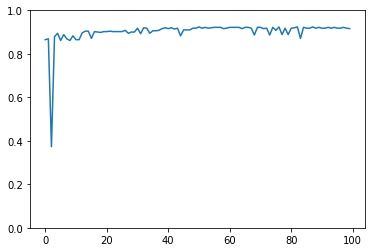

In [93]:
wt_matrix = perceptron.fit(X_train, Y_train, 100,0.001)

In [94]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

# test accuracy> train accuracy ,, very high probablity of overfitting

0.9298245614035088


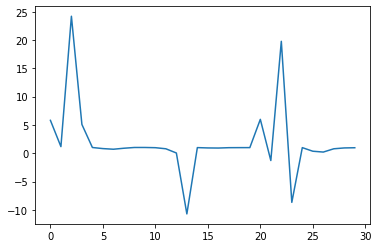

In [95]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [60]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

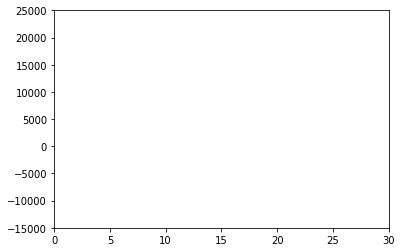

In [61]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [62]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [63]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [ ]:
HTML(anim.to_html5_video())